In [1]:
%env keras=Tensorflow

env: keras=Tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact,FloatSlider

In [3]:
from keras.models import Sequential,Model
from keras.layers import Input,Lambda
from keras.layers import Dense #NN
from keras.layers import Conv2D,MaxPooling2D #CNN
from keras.optimizers import SGD,Adam
from keras import metrics
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as k

C:\Users\w8462\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train0,y_train0),(x_test0,y_test0)=mnist.load_data()

In [5]:
x_train=x_train0.reshape(60000,-1) #-1為numpy自動計算
x_test=x_test0.reshape(10000,-1) #-1為numpy自動計算

x_train-=x_train.min()
x_train=x_train/x_train.max()

x_test-=x_test.min()
x_test=x_test/x_test.max()


# Autoencoder 自編碼器

In [6]:
enc_1=Dense(100,activation='sigmoid')
enc_2=Dense(2,activation='sigmoid')

dec_2=Dense(100,activation='sigmoid')
dec_1=Dense(784,activation='sigmoid')

In [7]:
x=Input(shape=(784,))

h=enc_2(enc_1(x))

x_hat=dec_1(dec_2(h))

autoencoder=Model(x,x_hat)

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(loss='mse',optimizer=Adam(lr=(1e-4)))

In [9]:
#autoencoder.fit(x_train,x_train,batch_size=1024,epochs=10)

In [10]:
autoencoder.load_weights('autoencoder_handwriting_model_weights.h5')

## 子模型取出

In [11]:
Encoder=Model(x,h)
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [12]:
h_input=Input(shape=(2,))
Decoder=Model(h_input,dec_1(dec_2(h_input)))

Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [13]:
index=5998
Encoder.predict(x_train[index:index+1])

array([[0.24474536, 0.11025778]], dtype=float32)

In [14]:
inds=np.random.randint(10000,size=3000)

In [15]:
latent=Encoder.predict(x_train[inds])
latent.shape


(3000, 2)

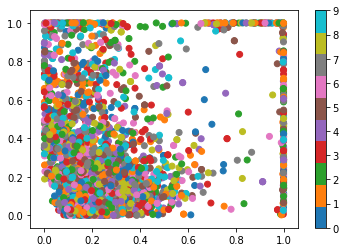

In [16]:
plt.scatter(latent[:,0],latent[:,1],c=y_test0[inds],cmap='tab10')
plt.colorbar()

In [17]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [18]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

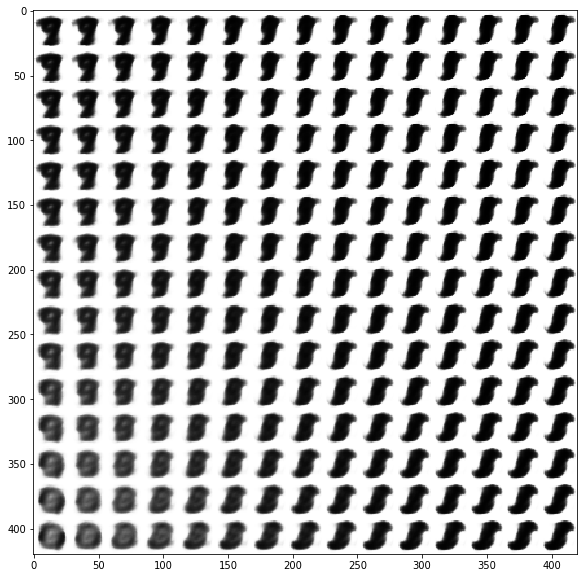

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys')
#plt.axis('off')
plt.show()